In [17]:
# Numerical and Data Manipulation
import numpy as np
import pandas as pd
import itertools

# Database Querying
import yfinance as yf

# Model Setup and Manipulation
from arch import arch_model
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Plotting
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [32]:
# def plot(data1, title, data2=None, data3=None, label=None, label1=None, label2=None):
#     plt.style.use('ggplot')
#     plt.figure(figsize=(10, 10))
#     plt.plot(data1, label=label)
#     plt.plot(data2, linestyle='--', label=label1)
#     plt.plot(data3, linestyle='-', label=label2)
#     plt.ylabel('Close')
#     plt.xlabel('Time')
#     plt.title(title)
#     plt.tight_layout()
#     plt.legend()
#     plt.show()

In [39]:
def plot(title, data1, data2=None, data3=None, label1=None, label2=None, label3=None):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 6))
    
    if isinstance(data1, (pd.Series, pd.DataFrame)):
        plt.plot(data1, label=label1)
        ylabel = data1.columns[0] if isinstance(data1, pd.DataFrame) else data1.name
        xlabel = data1.index.name
    else:
        plt.plot(data1, label1=label)
        ylabel = 'Time'
        xlabel = 'Price'
    
    if data2 is not None:
        if isinstance(data2, (pd.Series, pd.DataFrame)):
            plt.plot(data2, linestyle='--', label=label2)
    
    if data3 is not None:
        if isinstance(data3, (pd.Series, pd.DataFrame)):
            plt.plot(data3, linestyle='-', label=label3)
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel if xlabel is not None else 'Index')
    plt.title(title)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [3]:
def get_data(ticker, time_frame):
    '''
    Returns pandas DataFrame of given 
    ticker: company Ticker in Yahoo Finance
    time_frame = fraction of a year
    '''
    df = yf.download(ticker,
                     start=dt.datetime.today() - dt.timedelta(days=time_frame*365), 
                     end=dt.datetime.today())['Close']
    df = pd.DataFrame(df)
    return pd.DataFrame(df)

In [4]:
# Differencing
def diff(data, times):
    return list(itertools.chain(*(np.array((data - data.shift(-times).dropna()).dropna()).tolist())))

In [5]:
def volatility(data, time_frame):
    '''
    Returns volatility of given time frame.
    data: Pandas DataFrame
    time_frame: integer
    '''
    vol_list = []
    for i in range(len(data) + 1):
        for j in range(len(data) + 1):
            if j - i == time_frame:
                vol_list.append(np.std(np.array(((np.log(data) - np.log(data).shift(1)).dropna())[i:j]).tolist()))
                break
    return vol_list

In [6]:
def ma(data, days):
    data_list = list(itertools.chain(*data.values.tolist()))
    ma_list = []
    for i in data_list:
        for j in list(itertools.chain(*data.shift(days).values.tolist())):
            ma_list.append((i + j) / 2)
        break
    return ma_list

In [7]:
def ma(data, days):
    data_list = pd.DataFrame(list(itertools.chain(*data.values.tolist())))
    data_list_moved = pd.DataFrame(list(itertools.chain(*data.shift(days).values.tolist())))
    ma = ((data_list + data_list_moved) / 2).dropna()
    ma.index = data.index[days:]
    ma.columns = ['Close']
    return ma

In [23]:
def date(time_frame):    
    today = dt.date.today()
    n_years = (today - dt.timedelta(days=time_frame*365)).strftime('%Y-%m-%d')
    return today, n_years

In [27]:
TGT = get_data('TGT', 5)
today, n_years = date(1/4)
print(TGT)
print(today)
print(n_years)

[*********************100%%**********************]  1 of 1 completed

                 Close
Date                  
2019-06-27   85.870003
2019-06-28   86.610001
2019-07-01   86.940002
2019-07-02   87.040001
2019-07-03   87.900002
...                ...
2024-06-17  144.970001
2024-06-18  142.539993
2024-06-20  143.380005
2024-06-21  146.130005
2024-06-24  149.690002

[1256 rows x 1 columns]
2024-06-25
2024-03-26


In [10]:
ma50 = ma(TGT, 50)
ma50

,Close
Date,
2019-09-09,96.910000
2019-09-10,97.720001
2019-09-11,97.955002
2019-09-12,97.990002
2019-09-13,97.945000
...,...
2024-06-17,158.370003
2024-06-18,156.119995
2024-06-20,157.505005


In [11]:
ma200 = ma(TGT, 200)
ma200

,Close
Date,
2020-04-14,97.125000
2020-04-15,96.424999
2020-04-16,98.120003
2020-04-17,100.230000
2020-04-20,98.440002
...,...
2024-06-17,135.959999
2024-06-18,134.544998
2024-06-20,134.450001


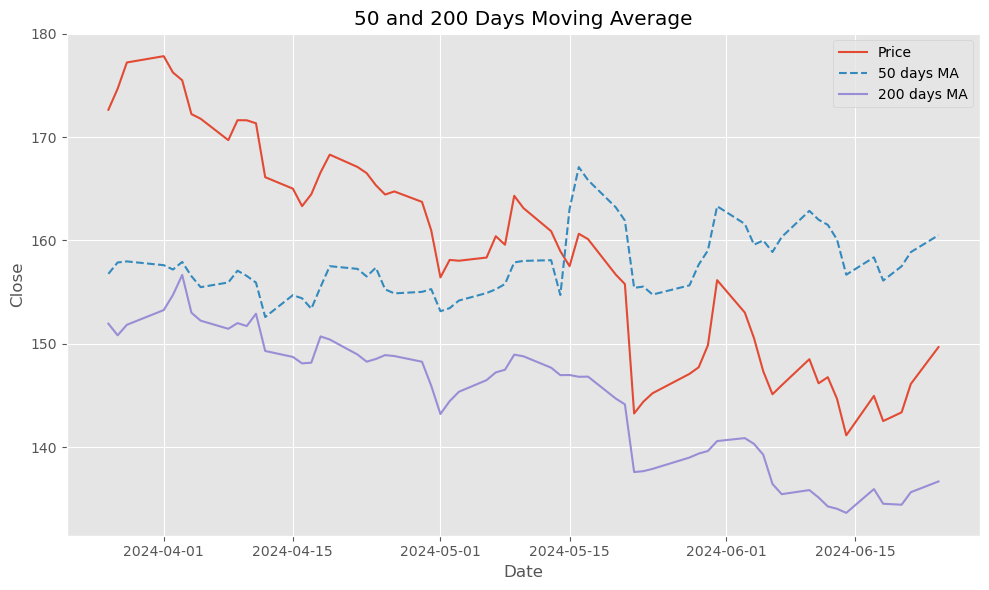

In [42]:
plot('50 and 200 Days Moving Average', TGT.loc[n_years:today], label1='Price', data2=ma50.loc[n_years:today], label2='50 days MA', data3=ma200.loc[n_years:today], label3='200 days MA')

In [30]:
# ChatGPT

prices = [
    172.63999938964844, 174.6699981689453, 177.2100067138672, 177.82000732421875,
    176.24000549316406, 175.49000549316406, 172.22000122070312, 171.77000427246094,
    169.6999969482422, 171.6300048828125, 171.6199951171875, 171.3300018310547,
    166.1199951171875, 165.00999450683594, 163.32000732421875, 164.47000122070312,
    166.5800018310547, 168.3000030517578, 167.11000061035156, 166.50999450683594,
    165.33999633789062, 164.44000244140625, 164.74000549316406, 163.72999572753906,
    160.97999572753906, 156.42999267578125, 158.1199951171875, 158.0399932861328,
    158.35000610351562, 160.41000366210938, 159.58999633789062, 164.32000732421875,
    163.1300048828125, 160.89999389648438, 158.9600067138672, 157.50999450683594,
    160.64999389648438, 160.1300048828125, 156.7100067138672, 155.77999877929688,
    143.27000427246094, 144.41000366210938, 145.22999572753906, 147.10000610351562,
    147.74000549316406, 149.8699951171875, 156.16000366210938, 153.02999877929688,
    150.5500030517578, 147.35000610351562, 145.1300048828125, 146.0,
    148.52000427246094, 146.19000244140625, 146.77999877929688, 144.67999267578125,
    141.16000366210938, 144.97000122070312, 142.5399932861328, 143.3800048828125,
    146.1300048828125, 149.69000244140625
]

# Create a DataFrame
df = pd.DataFrame(prices, columns=['Close'])

# Calculate the 50-day moving average
df['50_MA'] = df['Close'].rolling(window=2).mean()

# Print the DataFrame with the 50-day moving average
print(df)

         Close       50_MA
0   172.639999         NaN
1   174.669998  173.654999
2   177.210007  175.940002
3   177.820007  177.515007
4   176.240005  177.030006
..         ...         ...
57  144.970001  143.065002
58  142.539993  143.754997
59  143.380005  142.959999
60  146.130005  144.755005
61  149.690002  147.910004

[62 rows x 2 columns]
